<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Inception_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#first we import the necessary modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization,GlobalAveragePooling2D,concatenate,Input
from tensorflow.keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from IPython.display import display,Image


In [9]:
class Inception_network():
    def __init__(self, output_size):
        self.model = None
        self.input_shape = (223, 223, 3)
        self.output_size = output_size

    def inception_part(self, layer_input):
        cov_1 = Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(layer_input)
        cov_2 = Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(layer_input)
        maxpool_1 = MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(layer_input)
        cov_3 = Conv2D(64, 3, strides=1, activation='relu', padding='same')(cov_1)
        cov_4 = Conv2D(64, 3, strides=1, activation='relu', padding='same')(cov_2)
        cov_5 = Conv2D(64, 1, strides=1, padding='same', activation='relu')(maxpool_1)
        cov_6 = Conv2D(64, 1, strides=1, activation='relu', padding='same')(layer_input)
        concat = concatenate([cov_3, cov_4, cov_5, cov_6], axis=-1)
        return concat

    def build_model(self):
        input_tensor = Input(self.input_shape)
        x = Conv2D(32, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_tensor)
        y = MaxPool2D((2, 2), strides=(2, 2))(x)
        z = BatchNormalization()(y)
        a = Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(z)
        b = Conv2D(64, 3, strides=1, activation='relu', padding='same')(a)
        c = BatchNormalization()(b)
        d = MaxPool2D()(c)
        e = self.inception_part(d)
        batchnorm = BatchNormalization()(e)
        f = self.inception_part(batchnorm)
        batchnorm1 = BatchNormalization()(f)
        maxpool_3 = MaxPool2D()(batchnorm1)
        g = self.inception_part(maxpool_3)
        h1 = self.inception_part(g)
        h2 = self.inception_part(h1)
        h3 = self.inception_part(h2)
        h4 = self.inception_part(h3)
        h6 = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(h4)
        h9 = self.inception_part(h6)
        h10 = GlobalAveragePooling2D()(h9)
        h11 = Dense(1024, activation='relu')(h10)
        h12 = Dense(self.output_size, activation='softmax')(h11)

        # Wrap the model
        self.model = Model(inputs=input_tensor, outputs=h12)

    def model_summary(self):
        self.model.summary()

    def plot_model(self):
        plot_model(self.model, to_file='model.png', show_shapes=True, show_layer_names=True)
        display(Image('model.png'))

    def compile_model(self, optimizer, loss, metrics):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)



In [10]:
#now lets create an instance of the model
inception=Inception_network((30))


In [11]:
inception.build_model()

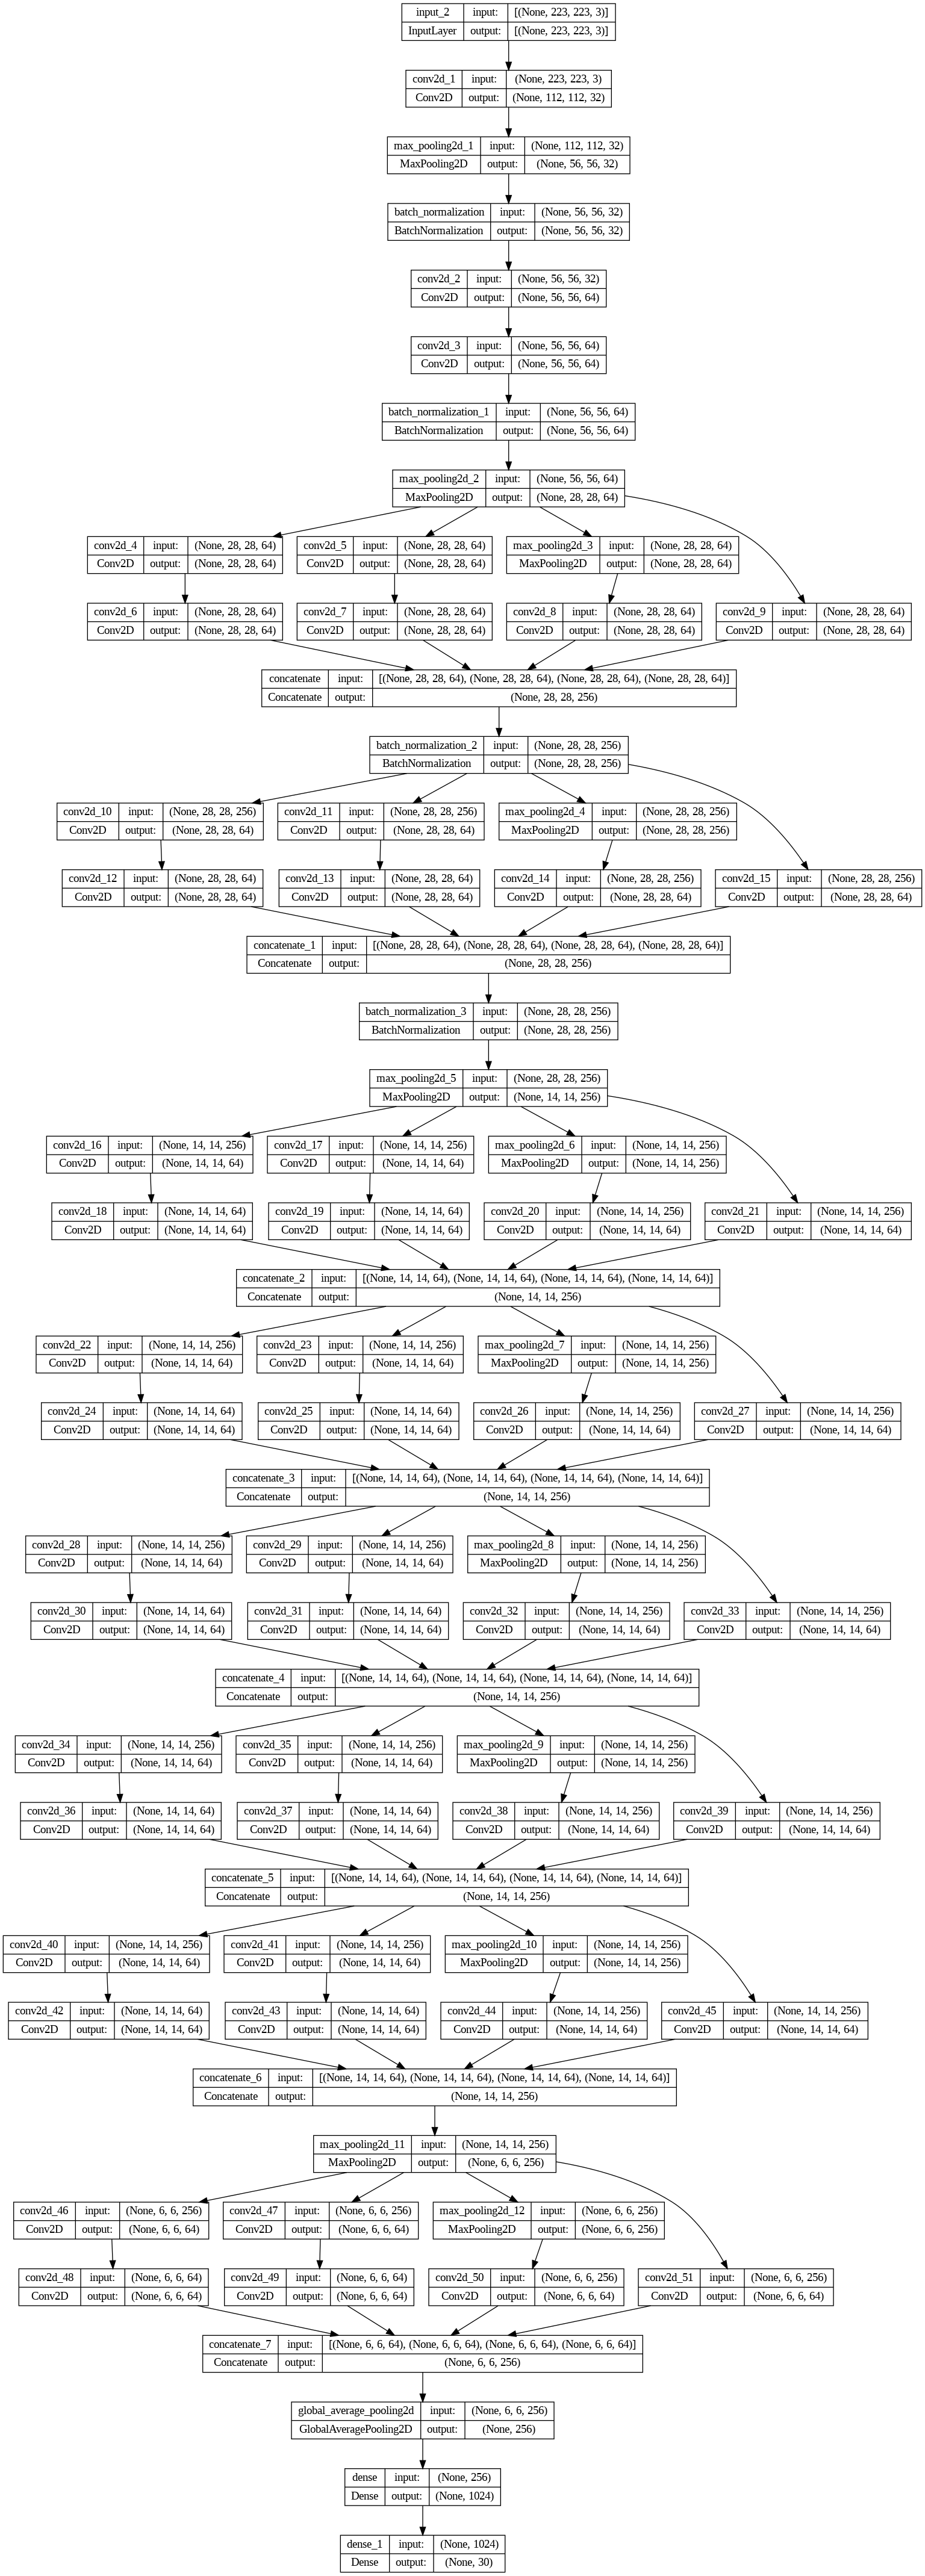

In [12]:
inception.plot_model()

In [13]:
inception.model_summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 223, 223, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 32)         4736      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)           0         ['conv2d_1[0][0]']            
 g2D)                                                                                             
                                                                                                  
 batch_normalization (Batch  (None, 56, 56, 32)           128       ['max_pooling2d_1[0][0]'] 